In [18]:
import numpy as np
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
import pandas as pd
#plt.style.use(['makina-notebook'])

## Train result

In [19]:
train_log_file = r'C:\Users\rnt\Downloads\Score_log.txt'

{'train': 174933.8452486992, 'eval': 18305.97802042961}


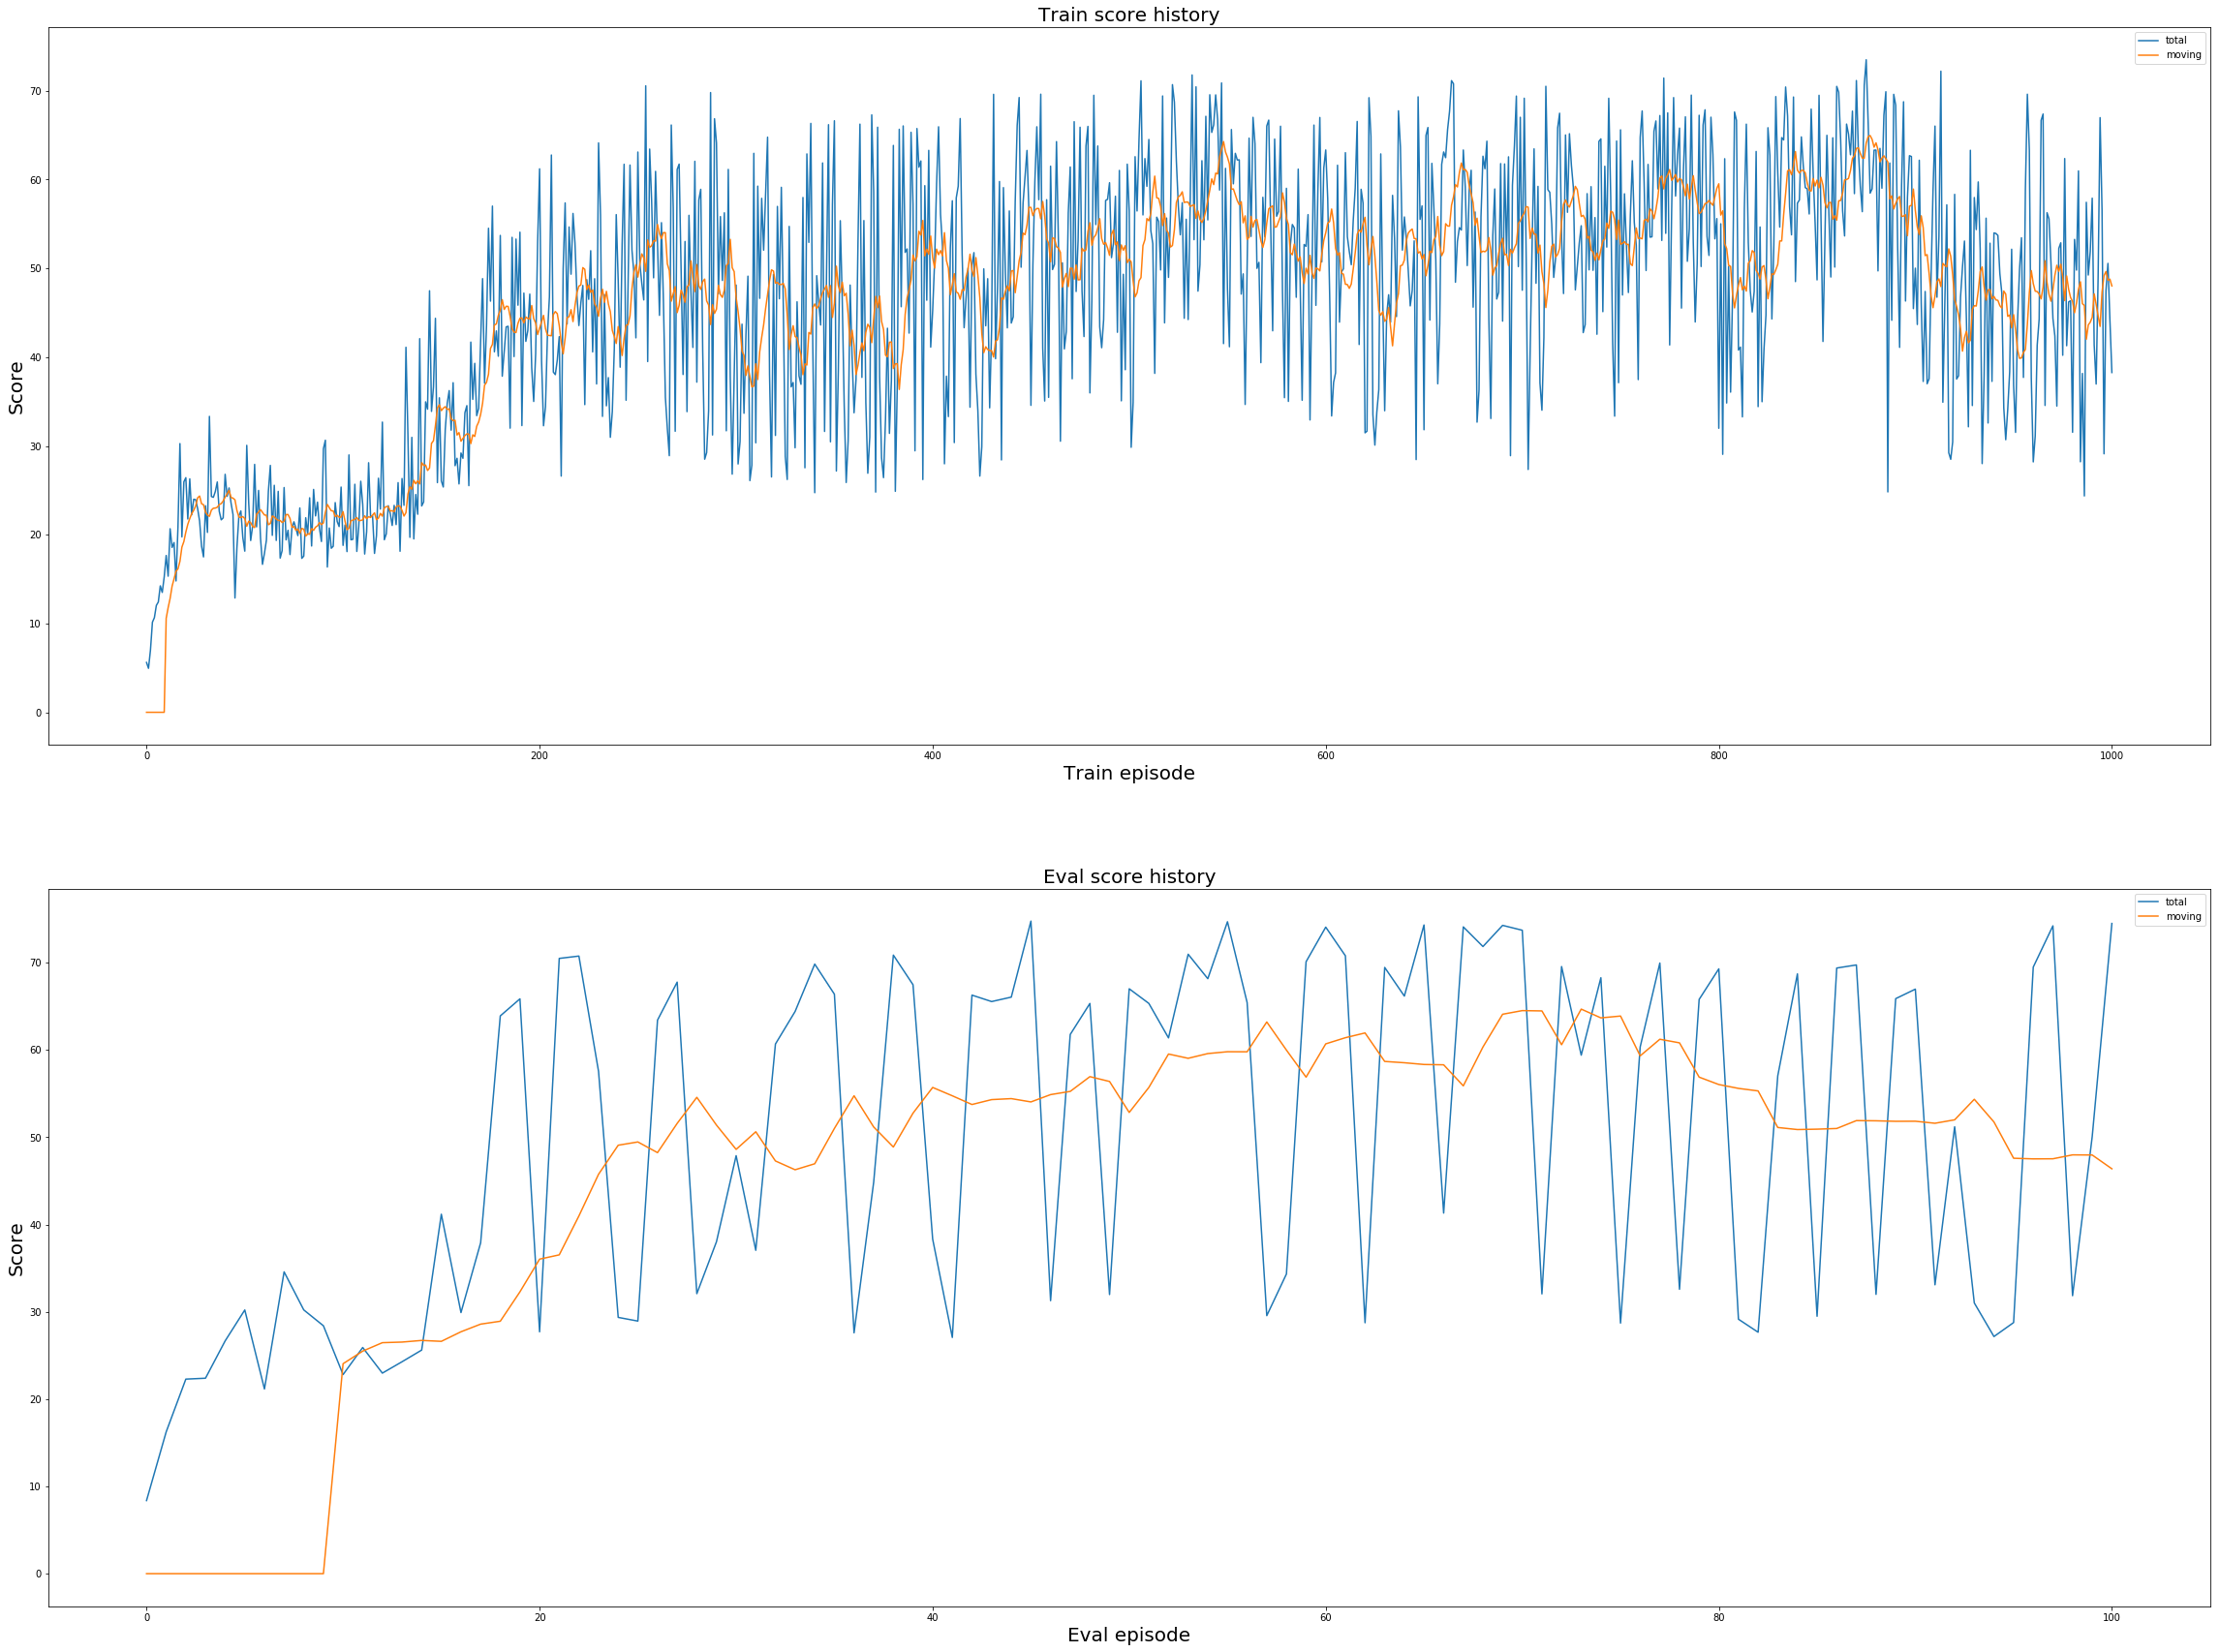

In [20]:
f = open(train_log_file, 'r')
lines = f.read().splitlines()
f.close()

time = {'train':0, 'eval': 0}
train_lst = []
eval_lst = []

for l in lines:
    split_e = l.split()
    if l.startswith('Episode_number'):
        if split_e[6] == 'False':
            flag = 'train'
        else:
            flag = 'eval'
    if l.startswith('Episode score'):
        time[flag] += float(split_e[4])
        if flag == 'train':
            train_lst.append(float(split_e[2][:-1]))
        else:
            eval_lst.append(float(split_e[2][:-1]))

print(time)

train_move = [sum(train_lst[i:i+10])/10 for i in range(len(train_lst)-10)]
train_move = [0]*10 + train_move
eval_move = [sum(eval_lst[i:i+10])/10 for i in range(len(eval_lst)-10)]
eval_move = [0]*10 + eval_move

fig, ax = plt.subplots(2, 1, figsize=(40,30))
ax[0].plot(train_lst, label='total')
ax[0].plot(train_move, label='moving')
ax[0].legend()
ax[0].set_title('Train score history', fontsize=20)
ax[0].set_xlabel('Train episode', fontsize=20)
ax[0].set_ylabel('Score', fontsize=20)

ax[1].plot(eval_lst, label='total')
ax[1].plot(eval_move, label='moving')
ax[1].legend()
ax[1].set_title('Eval score history', fontsize=20)
ax[1].set_xlabel('Eval episode', fontsize=20)
ax[1].set_ylabel('Score', fontsize=20)

plt.show()

## Eval result

In [21]:
eval_log_file = r'C:\Users\rnt\Downloads\Score_log.txt'
label_info = 'Constraint applied with cooling fan added'

In [22]:
f = open(eval_log_file, 'r')
lines = f.read().splitlines()
f.close()

result_dic = {}
for l in lines:
    split_e = l.split()
    if len(split_e) == 7:
        tmp = float(split_e[3][:-1])
        temp_lst = []
        cop_lst = []
        a1 = []
        a2 = []
        a3 = []
        a4 = []
    elif len(split_e) == 13:
        temp_lst += [float(split_e[5][:-1])]
        cop_lst += [float(split_e[-1])]
        split_ee = split_e[7].split(',')
        a1 += [float(split_ee[0][1:])]
        a2 += [float(split_ee[1])]
        a3 += [float(split_ee[2])]
        a4 += [float(split_ee[3][:-1])]
    if l.startswith('Episode score'):
        result_dic[tmp] = [temp_lst, cop_lst, a1, a2, a3]

In [23]:
f = open(eval_log_file, 'r')
lines = f.read().splitlines()
f.close()

result_dic = {}
for l in lines:
    split_e = l.split()
    if len(split_e) == 7:
        tmp = float(split_e[3][:-1])
        temp_lst = []
        cop_lst = []
        a1 = []
        a2 = []
        a3 = []
        a4 = []
    elif len(split_e) == 13:
        temp_lst += [float(split_e[5][:-1])]
        cop_lst += [float(split_e[-1])]
        split_ee = split_e[7].split(',')
        a1 += [float(split_ee[0][1:])]
        a2 += [float(split_ee[1])]
        a3 += [float(split_ee[2])]
        a4 += [float(split_ee[3][:-1])]
    if l.startswith('Episode score'):
        tmp_dict = {'temp':temp_lst,
                    'rpm': a1,
                    'cooling_fan':a2,
                    'EXV1':a3,
                    'EXV2':a4,
                    }
        result_dic[tmp] = tmp_dict
#         result_dic[tmp] = [temp_lst, cop_lst, a1, a2, a3]

In [24]:
empty_df = pd.DataFrame({"temp": [None], "rpm": [None], "cooling_fan": [None], "EXV1": [None], "EXV2": [None]})
print(pd.concat([empty_df, empty_df]))

   temp   rpm cooling_fan  EXV1  EXV2
0  None  None        None  None  None
0  None  None        None  None  None


In [25]:
array = []
for key, item in result_dic.items():
    item = pd.DataFrame(item)
    item["target_temperature"] = key
    empty_df = pd.DataFrame({"temp": [None], "rpm": [None], "cooling_fan": [None], "EXV1": [None], "EXV2": [None]})
    item = pd.concat([item, empty_df])
    array.append(item)
    
df = pd.concat(array).loc[:, ["target_temperature", "temp", "rpm", "cooling_fan", "EXV1", "EXV2"]]

print(df)
export_csv = df.to_csv ('SAC_bell_plus_discrete_4_inputs_no_cop_mapping_constraint_applied/seed_25159/export_moving_dataframe.csv', index = None, header=True)

    target_temperature    temp       rpm  cooling_fan   EXV1   EXV2
0                 18.0  43.990   499.375     1270.450  1.901  0.524
1                 18.0  43.432   998.379      268.264  1.939  0.550
2                 18.0  35.578  1492.854     2376.603  1.881  1.020
3                 18.0  28.299  1975.543     2838.410  1.531  0.694
4                 18.0  22.252  2448.993     2909.821  1.990  1.797
5                 18.0  18.722  2977.553     2802.679  1.992  1.875
6                 18.0  15.858  2290.182     2945.707  1.992  1.888
7                 18.0  16.002  1962.026     2812.441  1.978  1.856
8                 18.0  17.057  2027.178     2729.955  1.979  1.732
9                 18.0  17.483  2341.028     2757.502  1.925  1.976
10                18.0  16.644  2162.797     2933.946  1.938  1.839
11                18.0  16.715  1771.584     2849.506  1.994  1.899
12                18.0  18.209  1930.022     2699.290  1.978  1.890
13                18.0  18.561  2090.535     295

C:\Users\rnt\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  import sys


ImportError: cannot import name 'get_compression_method'

In [ ]:
df = pd.DataFrame(result_dic[7], columns= ['temp','rpm','cooling_fan'])

In [ ]:
export_csv = df.to_csv ('SAC_bell_plus_discrete_4_inputs_no_cop_mapping_constraint_applied/seed_25159/export_moving_dataframe.csv', index = None, header=True)

In [ ]:
for tmp in range(7, 24):
    fig, ax = plt.subplots(1, 3, figsize=(30,10))
    temp_lst, _, a1,a2,a3 = result_dic[tmp]
#     plt.tight_layout()
    ax[0].plot(temp_lst, label=label_info)
    ax[0].legend()
    ax[0].plot([tmp for _ in temp_lst], c='black')
    ax[0].set_xlabel('Eval step', fontsize=20)
    ax[0].set_ylabel('temp', fontsize=20)
#     ax[0].set_ylim(tmp-3,tmp+3)
    ax[0].set_ylim(5,45)

    ax[1].plot(a1, label=label_info)
    ax[1].legend()
    ax[1].set_xlabel('Eval step', fontsize=20)
    ax[1].set_ylabel('rpm', fontsize=20)
    ax[1].set_ylim(0, 9000)
    
    ax[2].plot(a2, label=label_info)
    ax[2].legend()
    ax[2].set_xlabel('Eval step', fontsize=20)
    ax[2].set_ylabel('cooling fan', fontsize=20)
    ax[2].set_ylim(1500,3200)
    
#     ax[3].plot(a3, label='train without cop 1tanh 2step')
#     ax[3].legend()
#     ax[3].set_xlabel('step', fontsize=20)
#     ax[3].set_ylabel('v2', fontsize=20)
#     ax[3].set_ylim(0.5,2.3)
    
#     ax[4].plot(a4, label='train without cop 1tanh 2step')
#     ax[4].legend()
#     ax[4].set_xlabel('step', fontsize=20)
#     ax[4].set_ylabel('v2', fontsize=20)
#     ax[4].set_ylim(0.5,2.3)
    
    plt.suptitle('{}℃'.format(tmp), fontsize=30)
    plt.savefig('SAC_bell_plus_discrete_4_inputs_no_cop_mapping_constraint_applied/seed_25159/moving_eval/save_fig_{}.png'.format(tmp))

### Temp

In [26]:
eval_log_file = r'C:\Users\rnt\Downloads\Score_log.txt'
label_info = 'Mapping applied'

In [27]:
f = open(eval_log_file, 'r')
lines = f.read().splitlines()
f.close()

result_dic = {}
for l in lines:
    split_e = l.split()
    if len(split_e) == 7:
        tmp = float(split_e[3][:-1])
        temp_lst = []
        cop_lst = []
        a1 = []
        a2 = []
        a3 = []
        a4 = []
    elif len(split_e) == 13:
        temp_lst += [float(split_e[5][:-1])]
        cop_lst += [float(split_e[-1])]
        split_ee = split_e[7].split(',')
        a1 += [float(split_ee[0][1:])]
        a2 += [float(split_ee[1])]
        a3 += [float(split_ee[2])]
        a4 += [float(split_ee[3][:-1])]
    if l.startswith('Episode score'):
        result_dic[tmp] = [temp_lst, cop_lst, a1, a2, a3]

In [28]:
for tmp in range(7,24):
    result_dic[tmp][2] = [0]+result_dic[tmp][2]
    diff = []
    for ind in range(len(result_dic[tmp][2])-1):
        diff.append(round((result_dic[tmp][2][ind+1]-result_dic[tmp][2][ind]),2))
    result_dic[tmp].append(diff)

KeyError: 7

KeyError: 7

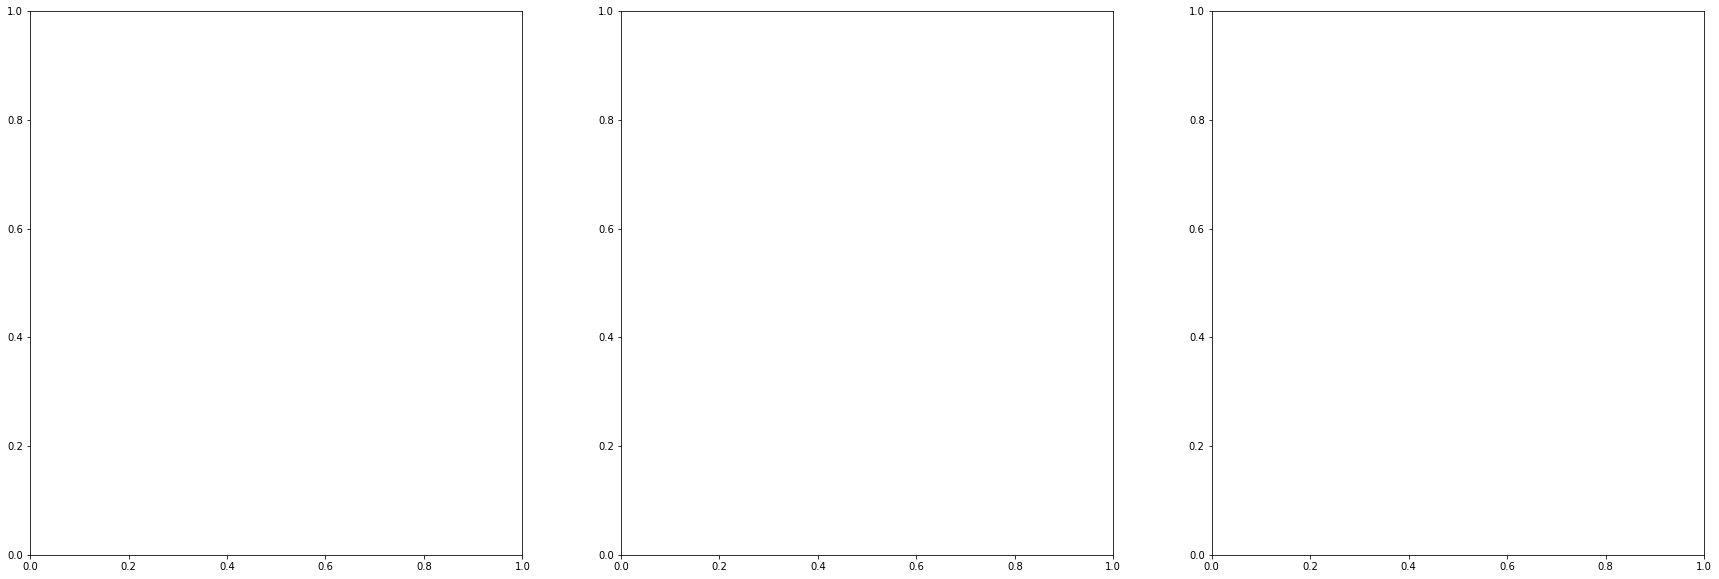

In [30]:
for tmp in range(7, 24):
    fig, ax = plt.subplots(1, 3, figsize=(30,10))
    temp_lst, _, a1,a2,a3,diff = result_dic[tmp]
#     plt.tight_layout()
    ax[0].plot(temp_lst, label=label_info)
    ax[0].legend()
    ax[0].plot([tmp for _ in temp_lst], c='black')
    ax[0].set_xlabel('Eval step', fontsize=20)
    ax[0].set_ylabel('temp', fontsize=20)
#     ax[0].set_ylim(tmp-3,tmp+3)
    ax[0].set_ylim(5,45)

    ax[1].plot(a1, label=label_info)
    ax[1].legend()
    ax[1].set_xlabel('Eval step', fontsize=20)
    ax[1].set_ylabel('rpm', fontsize=20)
    ax[1].set_ylim(0, 9000)
    
    ax[2].plot(diff, label=label_info)
    ax[2].legend()
    ax[2].plot([1350 for _ in temp_lst], c='black')
    ax[2].plot([-900 for _ in temp_lst], c='black')
    ax[2].set_xlabel('Eval step', fontsize=20)
    ax[2].set_ylabel('RPM difference', fontsize=20)
    ax[2].set_ylim(-1000,1500)
#     ax[2].plot([20 for _ in temp_lst[:5]], c='black')
    
#     ax[3].plot(a3, label='train without cop 1tanh 2step')
#     ax[3].legend()
#     ax[3].set_xlabel('step', fontsize=20)
#     ax[3].set_ylabel('v2', fontsize=20)
#     ax[3].set_ylim(0.5,2.3)
    
#     ax[4].plot(a4, label='train without cop 1tanh 2step')
#     ax[4].legend()
#     ax[4].set_xlabel('step', fontsize=20)
#     ax[4].set_ylabel('v2', fontsize=20)
#     ax[4].set_ylim(0.5,2.3)
    
    plt.suptitle('{}℃'.format(tmp), fontsize=30)
#     plt.savefig('SAC_bell_plus_discrete_4_inputs_no_cop_mapping_constraint_applied/seed_25159/moving_eval/save_fig_{}.png'.format(tmp))

### 결과가 여러개인 경우 mean & std

In [31]:
eval_log_file = r'C:\Users\rnt\Downloads\Score_log.txt'
label_info = 'SAC_bell_plus_discrete_4_inputs_no_cop_mapping_constraint_applied'

In [ ]:
f = open(eval_log_file, 'r')
lines = f.read().splitlines()
f.close()

final_dic = {}
for l in lines:
    split_e = l.split()
    if len(split_e) == 7:
        tmp = float(split_e[3][:-1])
        temp_lst = []
        cop_lst = []
        a1 = []
        a2 = []
        a3 = []
        a4 = []
    elif len(split_e) == 13:
        temp_lst += [float(split_e[5][:-1])]
        cop_lst += [float(split_e[-1])]
        split_ee = split_e[7].split(',')
        a1 += [float(split_ee[0][1:])]
        a2 += [float(split_ee[1])]
        a3 += [float(split_ee[2])]
        a4 += [float(split_ee[3][:-1])]
    if l.startswith('Episode score'):
        final_dic[tmp] = [temp_lst, cop_lst, a1, a2, a3]

In [32]:
eval_log_file = r'C:\Users\rnt\Downloads\Score_log.txt'
label_info = 'SAC_bell_plus_discrete_4_inputs_no_cop_mapping_constraint_applied'

In [ ]:
f = open(eval_log_file, 'r')
lines = f.read().splitlines()
f.close()

moving_dic = {}
for l in lines:
    split_e = l.split()
    if len(split_e) == 7:
        tmp = float(split_e[3][:-1])
        temp_lst = []
        cop_lst = []
        a1 = []
        a2 = []
        a3 = []
        a4 = []
    elif len(split_e) == 13:
        temp_lst += [float(split_e[5][:-1])]
        cop_lst += [float(split_e[-1])]
        split_ee = split_e[7].split(',')
        a1 += [float(split_ee[0][1:])]
        a2 += [float(split_ee[1])]
        a3 += [float(split_ee[2])]
        a4 += [float(split_ee[3][:-1])]
    if l.startswith('Episode score'):
        moving_dic[tmp] = [temp_lst, cop_lst, a1, a2, a3]

In [ ]:
def get_mean_std(lsts):
    np_arr = np.array(lsts)
    mean_arr = np_arr.mean(0)
    std_arr = np_arr.std(0)
    return mean_arr, std_arr

In [ ]:
def graph(ax, mean, std, color, label):
    ax.plot(mean, label=label, color=color)
    ax.fill_between(np.arange(len(mean)), mean+std, mean-std, color=color, alpha=0.1)

NameError: name 'final_dic' is not defined

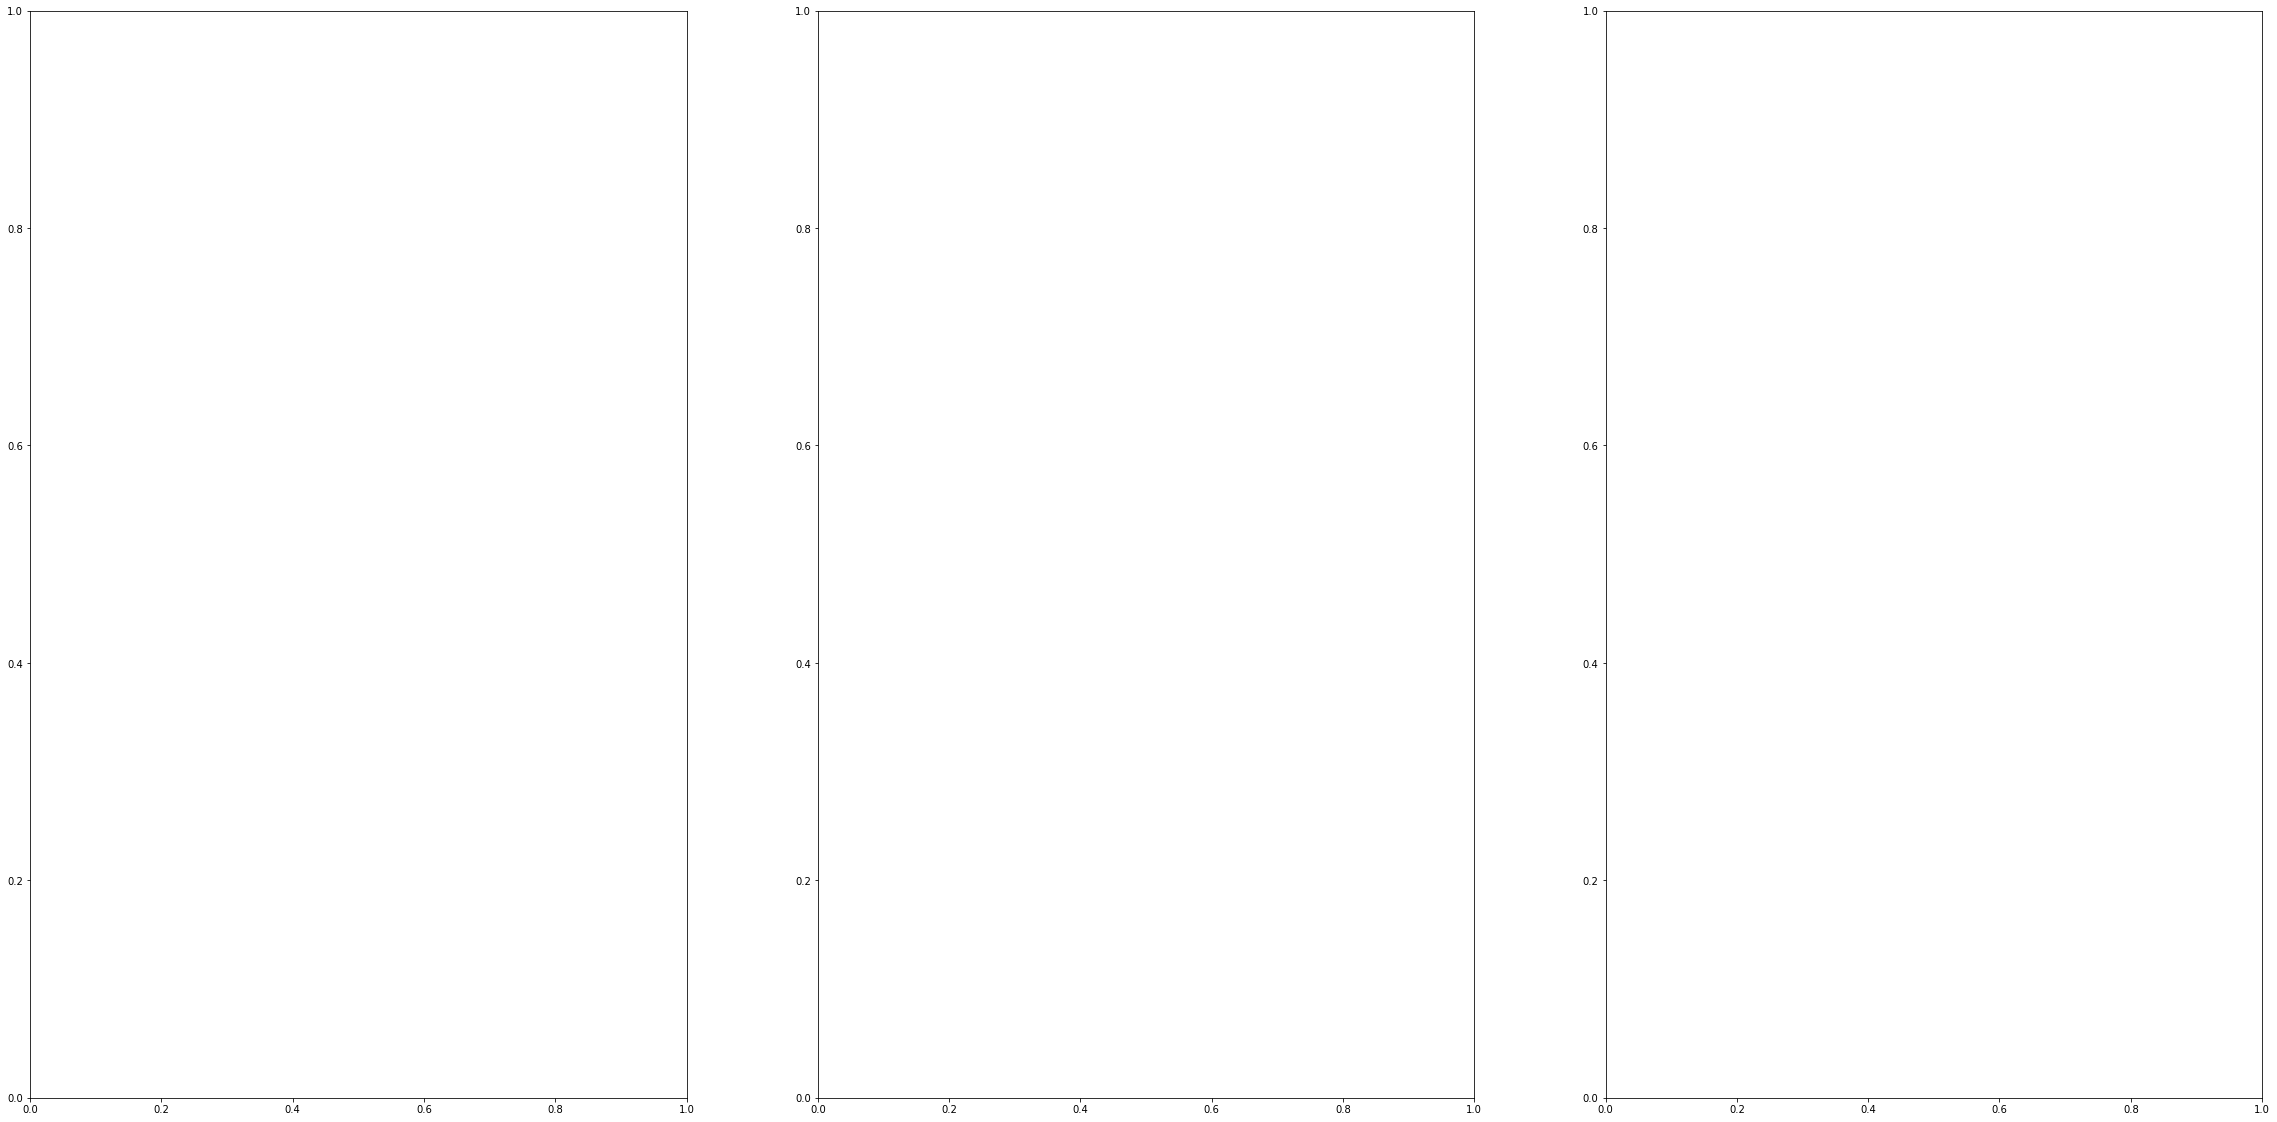

In [33]:
for tmp in range(7, 24):
    fig, ax = plt.subplots(1, 3, figsize=(40,20))
    temp_lst, _, a1,a2,a3 = final_dic[tmp]
    temp_lst2, _, a12,a22,a32 = moving_dic[tmp]
#     temp_lst3, _, a13,a23,a33 = dic3[tmp]
#     temp_lst4, _, a14,a24,a34 = dic4[tmp]
#     temp_lst5, _, a15,a25,a35 = dic5[tmp]
#     temp_lst6, _, a16,a26,a36 = dic6[tmp]
#     temp_lst7, _, a17,a27,a37 = dic7[tmp]
#     temp_lst8, _, a18,a28,a38 = dic8[tmp]
#     temp_lst9, _, a19,a29,a39 = dic9[tmp]
#     temp_lst10, _, a110,a210,a310 = dic10[tmp]
#     temp_lst11, _, a111,a211,a311 = dic11[tmp]
    
    
    temp_dic = {'moving': [temp_lst],
               'last': [temp_lst2]}
    a1_dic = {'moving':[a1],
              'last':[a12]}
    a2_dic = {'moving':[a2],
              'last': [a22]}
    a3_dic = {'moving':[a3],
              'last': [a32]}
    
    temp_move_mean, temp_move_std = get_mean_std(temp_dic['moving'])
    temp_last_mean, temp_last_std = get_mean_std(temp_dic['last'])
    a1_move_mean, a1_move_std = get_mean_std(a1_dic['moving'])
    a1_last_mean, a1_last_std = get_mean_std(a1_dic['last'])
    a2_move_mean, a2_move_std = get_mean_std(a2_dic['moving'])
    a2_last_mean, a2_last_std = get_mean_std(a2_dic['last'])
    a3_move_mean, a3_move_std = get_mean_std(a3_dic['moving'])
    a3_last_mean, a3_last_std = get_mean_std(a3_dic['last'])
    
    graph(ax[0], temp_move_mean, temp_move_std, color='C0', label='moving')
    graph(ax[0], temp_last_mean, temp_last_std, color='C2', label='last')
    ax[0].legend()
    ax[0].plot([tmp for _ in temp_lst], c='black')
    ax[0].set_xlabel('Eval step', fontsize=20)
    ax[0].set_ylabel('Temperature(℃)', fontsize=20)
    ax[0].set_ylim(5, 45)
    ax[0].set_title('Eval {}℃'.format(tmp), fontsize=25)
    
    graph(ax[1], a1_move_mean, a1_move_std, color='C0', label='moving')
    graph(ax[1], a1_last_mean, a1_last_std, color='C2', label='last')
    ax[1].legend()
    ax[1].set_xlabel('Eval step', fontsize=20)
    ax[1].set_ylabel('Compressor RPM', fontsize=20)
    ax[1].set_ylim(0, 9000)
    ax[1].set_title('Eval {}℃'.format(tmp), fontsize=25)
    
    graph(ax[2], a2_move_mean, a2_move_std, color='C0', label='moving')
    graph(ax[2], a2_last_mean, a2_last_std, color='C2', label='last')
    ax[2].legend()
    ax[2].set_xlabel('Eval step', fontsize=20)
    ax[2].set_ylabel('Cooling fan', fontsize=20)
    ax[2].set_ylim(1500, 3200)
    ax[2].set_title('Eval {}℃'.format(tmp), fontsize=25)
    
    graph(ax[2], a2_move_mean, a2_move_std, color='C0', label='moving')
    graph(ax[2], a2_last_mean, a2_last_std, color='C2', label='last')
    ax[2].legend()
    ax[2].set_xlabel('step', fontsize=20)
    ax[2].set_ylabel('v1', fontsize=20)
    ax[2].set_ylim(0.5,2.3)
    
    graph(ax[3], a3_move_mean, a3_move_std, color='C0', label='moving')
    graph(ax[3], a3_last_mean, a3_last_std, color='C2', label='last')
    ax[3].legend()
    ax[3].set_xlabel('step', fontsize=20)
    ax[3].set_ylabel('v2', fontsize=20)
    ax[3].set_ylim(0.5,2.3)
    
    plt.savefig('{}.png'.format(tmp))
    plt.suptitle('{}℃'.format(tmp), fontsize=30)